In [3]:
'''
@Authors Mateusz Woźniak 18182, Jakub Włoch 16912
Reference: 
- https://www.kaggle.com/sriram1204/abalone-machine-learning-insights
- https://github.com/codebasics/py/blob/master/ML/10_svm/10_svm.ipynb
'''
'''
Library and data import
'''
import pandas as pd
df = pd.read_csv("C:\\Users\\emtti\\OneDrive\\Pulpit\\PJATK\\NAI\\abalone.data")

In [4]:
'''Display head of data'''
df.head()

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [5]:
'''Rename column names'''
df = df.rename(columns={'M': 'Sex', '0.455': 'Length', '0.364': 'Diameter', '0.095': 'Height',
                        '0.514': 'Whole weight', '0.2245': 'Shucked weight', '0.101': 'Viscera weight',
                        '0.15': 'Shell weight', '15': 'Rings'})
df.head()

,Sex,Length,0.365,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [6]:
'''Add Age column - Rings / integer / -- / + 1.5 gives the age in years'''
df['Age'] = df['Rings'] + 1.5
df['Age'].head()

0     8.5
1    10.5
2    11.5
3     8.5
4     9.5
Name: Age, dtype: float64

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

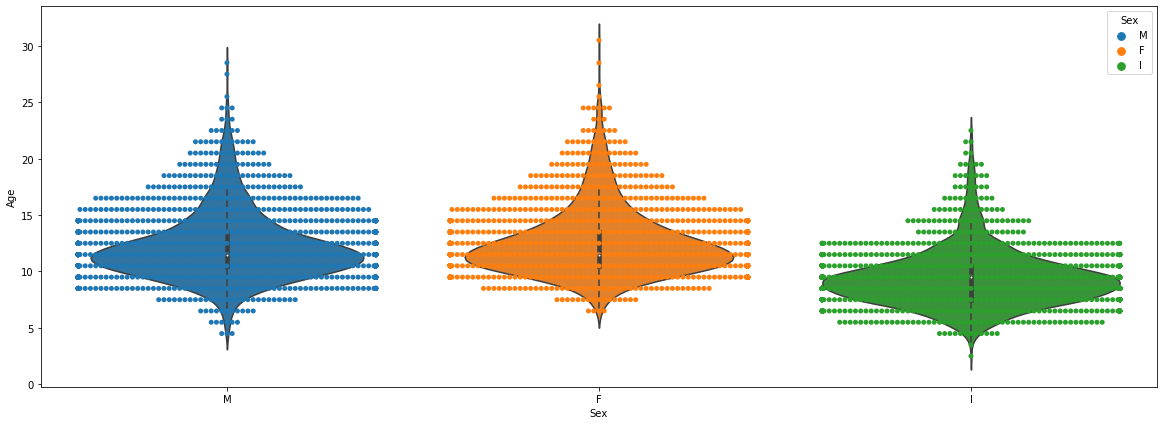

In [8]:
'''Sex and Age Visulization'''
plt.figure(figsize = (20,7))
sns.swarmplot(x = 'Sex', y = 'Age', data = df, hue = 'Sex')
sns.violinplot(x = 'Sex', y = 'Age', data = df)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [10]:
'''LabelEnconding the Categorical Data'''
df['Sex'] = LabelEncoder().fit_transform(df['Sex'].tolist())

In [11]:
'''One Hot Encoding for Sex Feature '''
transformed_sex_feature = OneHotEncoder().fit_transform(df['Sex'].values.reshape(-1,1)).toarray()
df_sex_encoded = pd.DataFrame(transformed_sex_feature, columns = ["Sex_"+str(int(i)) for i in range(transformed_sex_feature.shape[1])])
df = pd.concat([df, df_sex_encoded], axis=1)

In [12]:
df.head()

,Sex,Length,0.365,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_0,Sex_1,Sex_2
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5,0.0,1.0,0.0


In [13]:
'''Prepare sets for learning and predicting features'''
Xtrain = df.drop(['Rings','Age','Sex'], axis = 1)
Ytrain = df['Rings']

In [14]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [15]:
len(X_train)

2797

In [16]:
len(X_test)

1379

In [17]:
'''Train model using Support Vector Machine'''
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, Y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
'''Accuracy score for predicted set'''
model.score(X_test, Y_test)

0.2668600435097897

In [19]:
'''Adjust kernel, gamma and regularization'''
linear_model = SVC(kernel='linear', C=1, gamma=1)
linear_model.fit(X_train, Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [20]:
'''Accuracy score for predicted set after adjustments'''
linear_model.score(X_test,Y_test)

0.252356780275562

In [21]:
new_df = df.copy()
import numpy as np

In [22]:
'''Feature Engineering , class 1 - 1-8, class 2 - 9-8, class 3 - 11 >'''
new_df['newRings_1'] = np.where(df['Rings'] <= 8,1,0)
new_df['newRings_2'] = np.where(((df['Rings'] > 8) & (df['Rings'] <= 10)), 2,0)
new_df['newRings_3'] = np.where(df['Rings'] > 10,3,0)

In [23]:
new_df['newRings'] = new_df['newRings_1'] + new_df['newRings_2'] + new_df['newRings_3']

In [24]:
new_df.head()

,Sex,Length,0.365,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Age,Sex_0,Sex_1,Sex_2,newRings_1,newRings_2,newRings_3,newRings
0,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7,8.5,0.0,0.0,1.0,1,0,0,1
1,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9,10.5,1.0,0.0,0.0,0,2,0,2
2,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10,11.5,0.0,0.0,1.0,0,2,0,2
3,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7,8.5,0.0,1.0,0.0,1,0,0,1
4,1,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8,9.5,0.0,1.0,0.0,1,0,0,1


In [25]:
'''Learning Features and Predicting Features'''
Xtrain = new_df.drop(['Rings','Age','Sex','newRings_1','newRings_2','newRings_3'], axis = 1)
Ytrain = new_df['newRings']

In [26]:
'''Train Test Split , 70:30 Ratio'''
X_train, X_test, Y_train, Y_test = train_test_split(Xtrain, Ytrain, test_size=0.33, random_state=42)

In [27]:
linear_model = SVC(kernel='linear', C=1, gamma=1)
linear_model.fit(X_train, Y_train)

SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
linear_model.score(X_test,Y_test)

1.0